In [1]:
# %%capture
# !pip install -U pandasql
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
# from pandasql import sqldf 

In [3]:
table = pd.read_csv('/Users/marcovinciguerra/Desktop/NNdata.csv')
table.head()


Date  IDStation NameStation  Ammonia  Arsenic  \
0  2018-01-01T00:00:00Z        681      Moggio      1.4      NaN   
1  2018-01-02T00:00:00Z        681      Moggio      1.0      NaN   
2  2018-01-03T00:00:00Z        681      Moggio      1.0      NaN   
3  2018-01-04T00:00:00Z        681      Moggio      1.4      NaN   
4  2018-01-05T00:00:00Z        681      Moggio      1.7      NaN   

   Benzo_a_pyrene  Cadmium  Lead  Nikel        NO  ...  IDStation.2  \
0             NaN      NaN   NaN    NaN  0.341667  ...          111   
1             NaN      NaN   NaN    NaN  0.000000  ...          111   
2             NaN      NaN   NaN    NaN  0.000000  ...          111   
3             NaN      NaN   NaN    NaN  0.008333  ...          111   
4             NaN      NaN   NaN    NaN  0.125000  ...          111   

               NameStation.1  Wind_speed  Wind_direction  Temperature  \
0  Cassina Valsassina Moggio    0.300970              65     2.095833   
1  Cassina Valsassina Moggio    0.613183               9     1.670139   
2  Cassina Valsassina Moggio    0.539172              28     1.972222   
3  Cassina Valsassina Moggio    0.211450              21     3.081250   
4  Cassina Valsassina Moggio    0.116953              87     3.653472   

   Relative_humidity  Global_radiation Wind_speed_max  Wind_direction_max  \
0          74.055556         60.152778       1.939583                 144   
1          39.194444         68.250000       3.075000                 213   
2          48.090278         16.458333       2.706944                 161   
3          74.986111         70.145833       1.986111                 172   
4          85.444444         44.659722       1.868750                 155   

  Rainfall  
0      2.4  
1      0.0  
2      0.6  
3      0.0  
4      0.0  

[5 rows x 28 columns]

# Nuova sezione

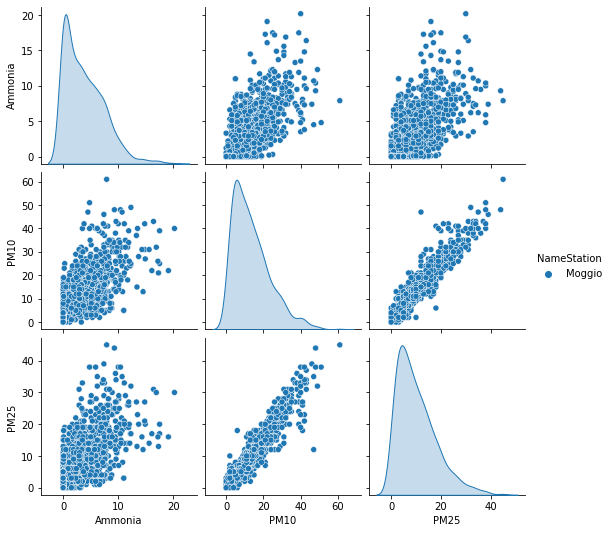

In [4]:
sns.pairplot(table.loc[:,["NameStation","Ammonia","PM10","PM25"]],hue="NameStation")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

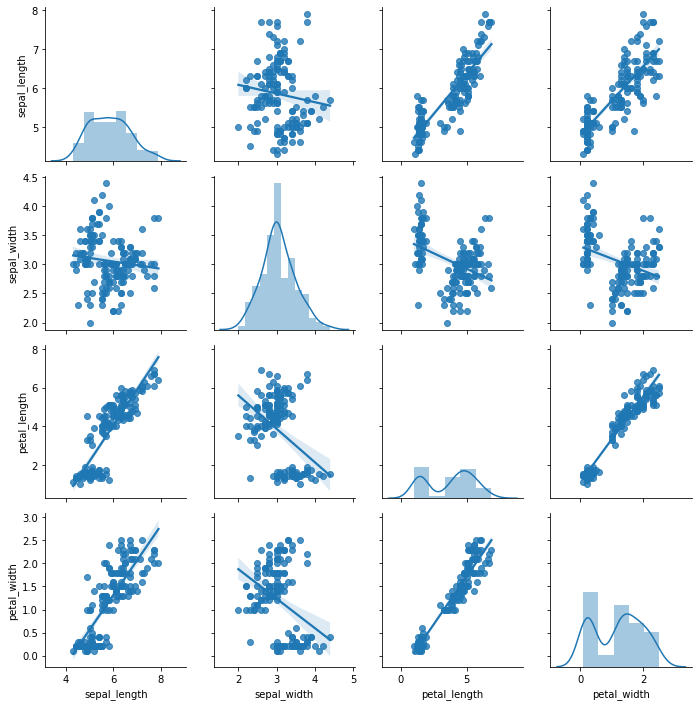

In [ ]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(sns.regplot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

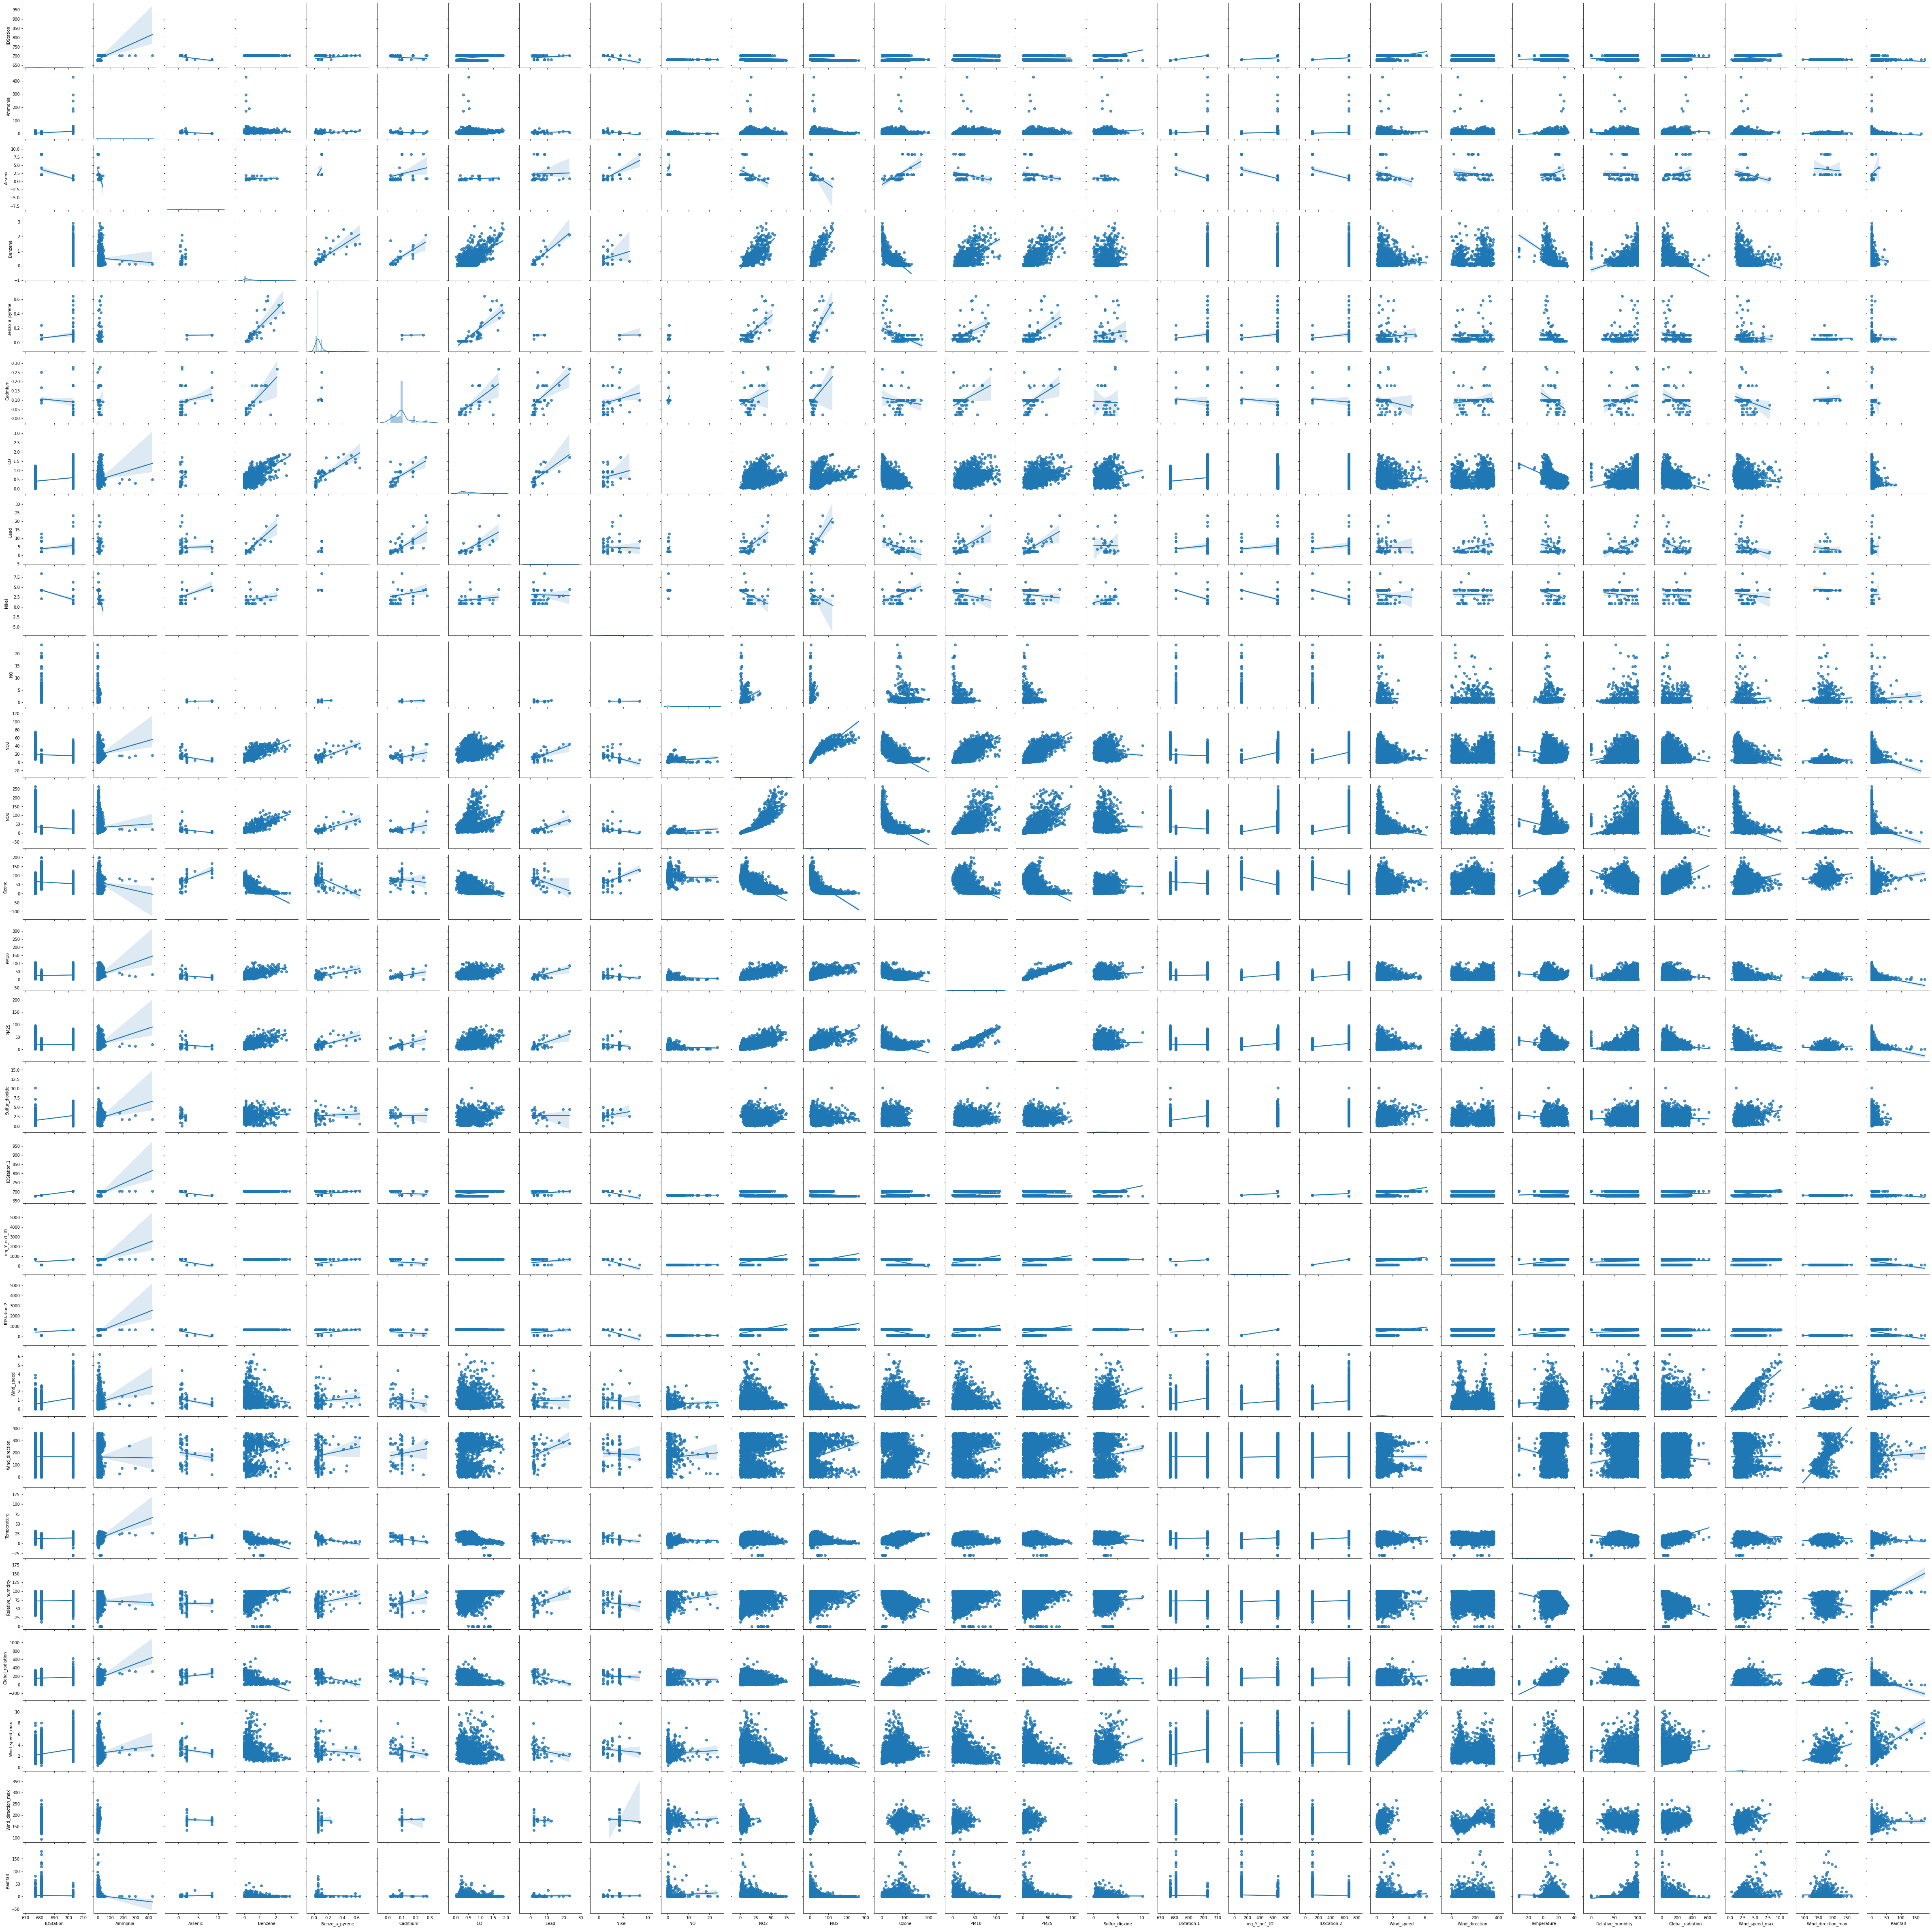

In [ ]:
g = sns.PairGrid(table)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(sns.regplot)

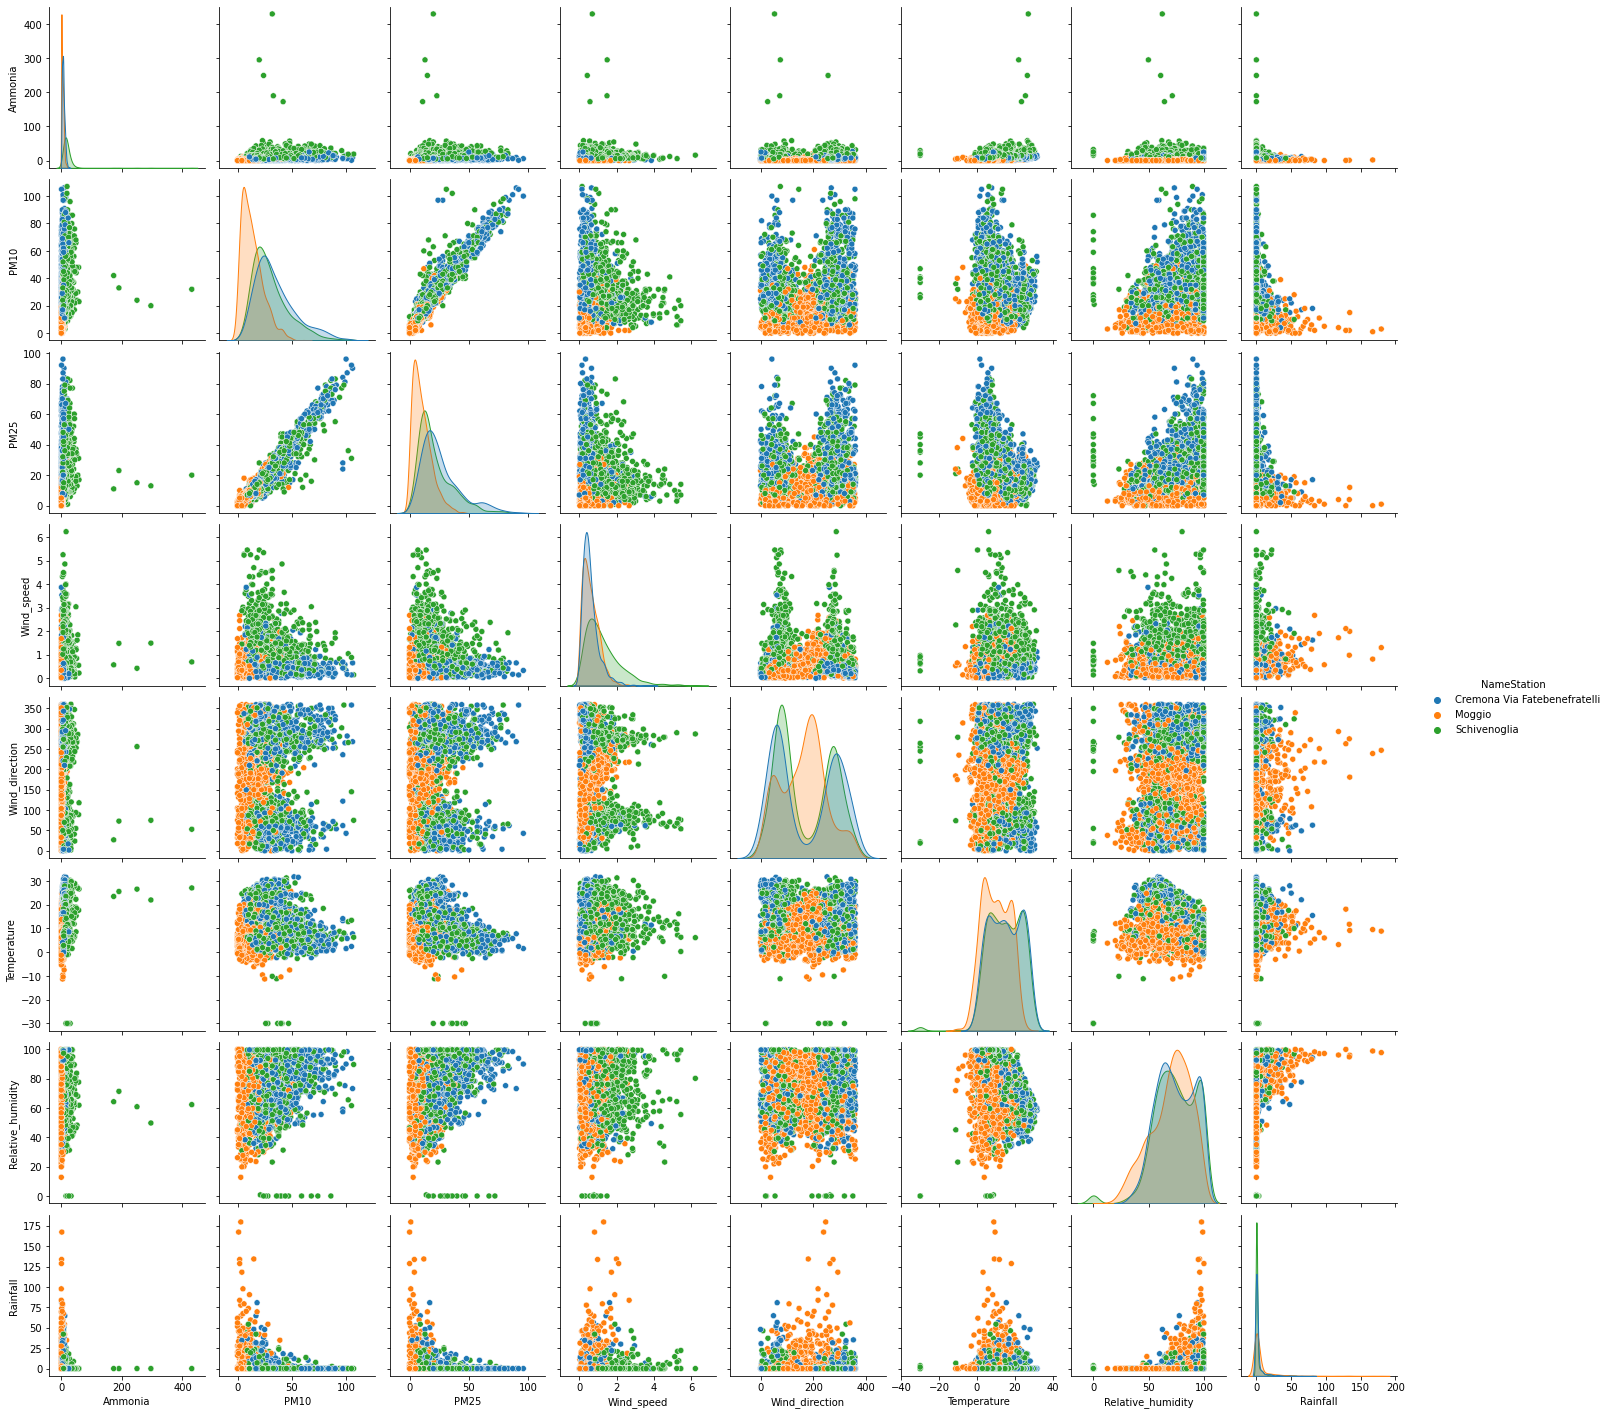

In [ ]:
sns.pairplot(table.loc[:,['NameStation','Ammonia','PM10','PM25','Wind_speed','Wind_direction','Temperature','Relative_humidity','Rainfall']],hue="NameStation")

In [ ]:
# now with rainfall zero values set to NaN
table1r = table.copy()
table1r.loc[table.loc[:,'Rainfall']==0,'Rainfall'] = np.nan
sns.pairplot(table1r.loc[:,['NameStation','Ammonia','PM10','PM2.5','Temperature','Relative_humidity','Global_radiation','Rainfall']],hue="NameStation")

In [ ]:

table2 = table.iloc[2000:np.shape(table)[0],:] #altair can only use up to 5000 rows

interval = alt.selection_interval()

points = alt.Chart(table2).mark_point().encode(
  x='PM10',
  y='Ammonia',
  color=alt.condition(interval, 'NameStation', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(table2).mark_bar().encode(
  x='count()',
  y='NameStation',
  color='NameStation'
).transform_filter(interval)

points & histogram

NameError: ignored

In [ ]:
table1.head()

NameError: ignored

In [ ]:
table2 = table.iloc[2000:np.shape(table)[0],:] #altair can only use up to 5000 rows
table3 = table2.copy()
# remove outliers
table3.loc[table2.loc[:,'Ammonia']>150,'Ammonia'] = np.nan
table3.loc[table2.loc[:,'PM10']>140,'PM10'] = np.nan

In [ ]:

# create plot again
interval = alt.selection_interval()

table4 = table1.iloc[2000:np.shape(table)[0],:]

points = alt.Chart(table4).mark_point().encode(
  x='Temperature',
  y='Ammonia',
  color=alt.condition(interval, 'NameStation', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(table3).mark_bar().encode(
  x='count()',
  y='NameStation',
  color='NameStation'
).transform_filter(interval)

points & histogram

In [ ]:
# bubble chart scatterplot